In [1]:
import numpy as np

import matplotlib.pyplot as plt

from continous_tf import Continous_TF

from falling_factorial_gen import Falling_Factorial_Basis

from adaptive_tf import adaptive_tf
from cv_tf import cross_validation
from matrix_algorithms.difference_matrix import Difference_Matrix
from matrix_algorithms.time_difference_matrix import Time_Difference_Matrix

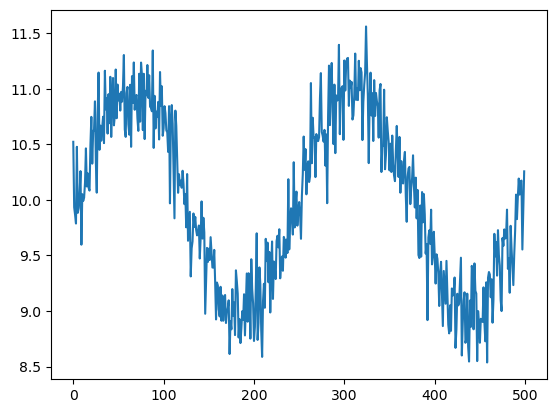

In [2]:
noisy_signal =np.sin(2*np.linspace(0, 2 * np.pi, 500)) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Prep Adaptive TF Problem

In [3]:
D=Difference_Matrix(500,1)


In [4]:
best_lambda=cross_validation(noisy_signal.reshape(-1,1),D,cv_folds=20,cv_iterations=2)

Performing  0 out of 2 iterations of cross validation
Performing cross validation for lambda = 2.4426909308969063e-05
Performing cross validation for lambda = 6.440523238269816e-05
Performing cross validation for lambda = 0.00016981411384477886
Performing cross validation for lambda = 0.00044774053588593596
Performing cross validation for lambda = 0.001180535486341664
Performing cross validation for lambda = 0.0031126599510458257
Performing cross validation for lambda = 0.008206997657366977
Performing cross validation for lambda = 0.021638987749174606
Performing cross validation for lambda = 0.05705445649647638
Performing cross validation for lambda = 0.1504326839980064
Performing cross validation for lambda = 0.39663847146176395
Performing cross validation for lambda = 1.0457971822506964
Performing cross validation for lambda = 2.757402080470972
Performing cross validation for lambda = 7.270306673634741
Performing cross validation for lambda = 19.169260625084377
Performing cross valid

In [5]:
results=adaptive_tf(noisy_signal.reshape(-1,1),D,prior=best_lambda)

### Let's Visualize results

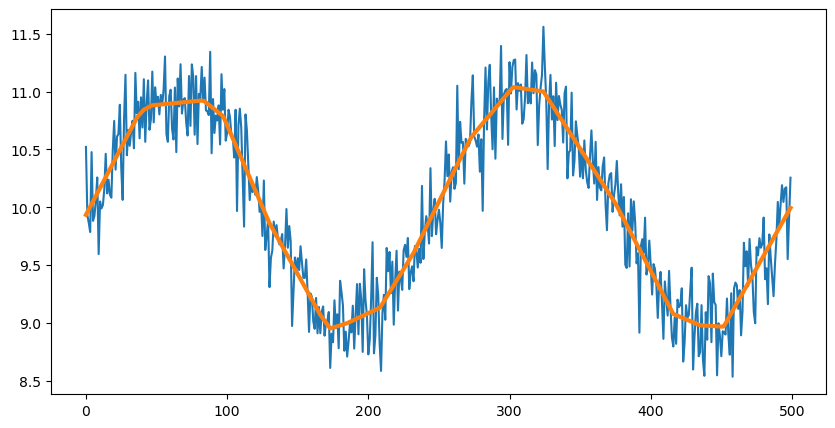

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)

### Construction of Falling Factorial Basis

In [7]:
x_tf=results["sol"].x

t=np.arange(1,501)
ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [8]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [9]:
ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[9.93554137]
 [0.02323132]]
Number of theta coefficients: 498
Theta coefficients: [[ 1.78026482e-11]
 [ 3.52553542e-11]
 [ 4.96882535e-11]
 [ 5.73336933e-11]
 [ 8.16466894e-11]
 [ 1.02009068e-10]
 [ 1.17919896e-10]
 [ 1.33333344e-10]
 [ 1.58062008e-10]
 [ 1.52766688e-10]
 [ 1.41307410e-10]
 [ 1.20875754e-10]
 [ 9.44773149e-11]
 [ 6.83666457e-11]
 [ 5.16493515e-11]
 [ 3.07380787e-11]
 [ 8.71480665e-12]
 [-1.97601935e-11]
 [-5.86606319e-11]
 [-9.96909222e-11]
 [-1.33828948e-10]
 [-1.82817317e-10]
 [-2.35363729e-10]
 [-2.87922575e-10]
 [-3.02415870e-10]
 [-3.43213458e-10]
 [-4.99872144e-10]
 [-7.09679426e-10]
 [-7.13324511e-10]
 [-8.07338196e-10]
 [-8.98472408e-10]
 [-1.14241061e-09]
 [-1.61415059e-09]
 [-2.42834020e-09]
 [-2.98502538e-08]
 [-5.96836948e-03]
 [-3.69068733e-03]
 [-1.00056621e-08]
 [-3.14091491e-08]
 [-1.36938727e-08]
 [-7.23195370e-03]
 [-7.07534120e-09]
 [-1.96487626e-08]
 [-2.22588915e-05]
 [-7.17755277e-09]
 [-8.55737703e

In [10]:
x_tf[0]-x_tf[1]

array([-0.02323132])

In [11]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [104.55]])

### Let's Visualize the Coefficients

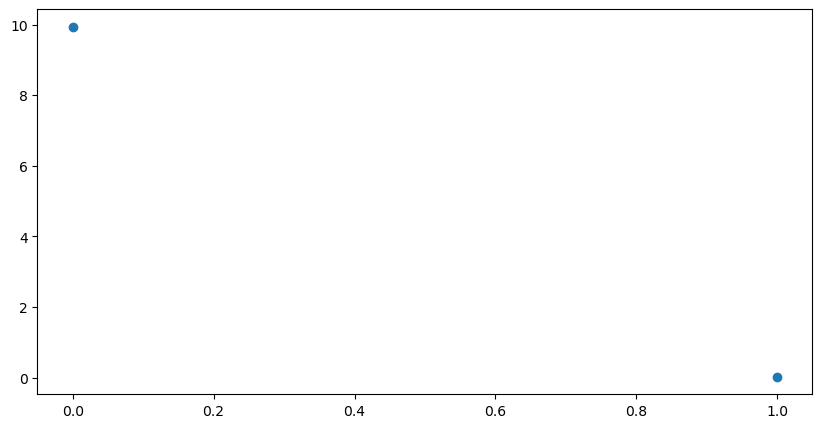

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

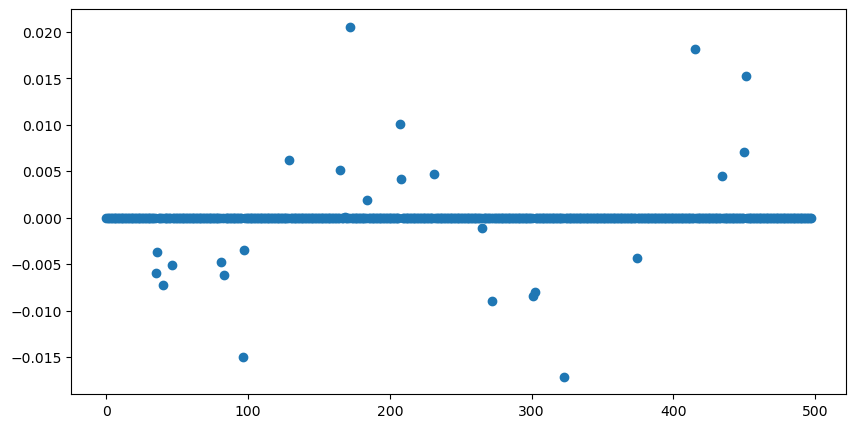

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

In [14]:
D=Difference_Matrix(500,0)
D.D

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

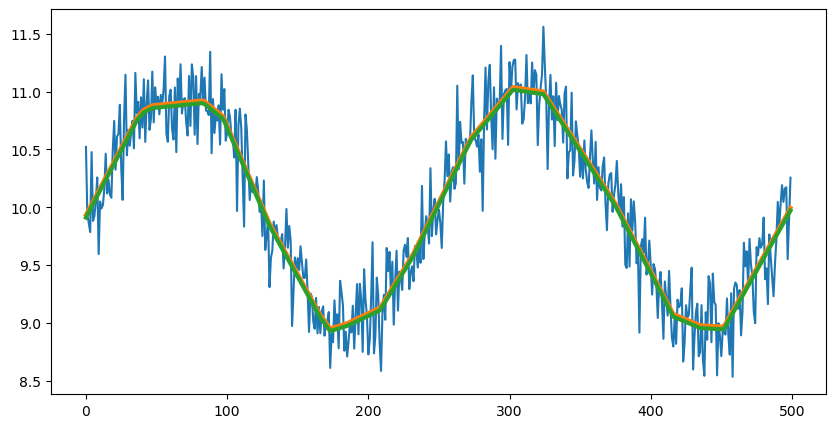

In [15]:
x_equal=np.arange(0,500)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)
